In [1]:
#on commence par cartiflette parce que sinon bug sur version d'un package 
!pip install requests py7zr geopandas openpyxl tqdm s3fs PyYAML xlrd
!pip install git+https://github.com/inseefrlab/cartogether


  Cloning https://github.com/inseefrlab/cartogether to /tmp/pip-req-build-3s4eysci
  Running command git clone --filter=blob:none --quiet https://github.com/inseefrlab/cartogether /tmp/pip-req-build-3s4eysci
  Resolved https://github.com/inseefrlab/cartogether to commit 70f30d1659983a35e426480d684b40d4ba33b84e
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [2]:
import cartiflette.s3



In [3]:
#on a probablement pas besoin de garder tout ça
!pip install pathlib2
!pip install python-Levenshtein
!pip install --upgrade xlrd
!pip install git+https://github.com/InseeFrLab/Py-Insee-Data.git


!pip install --ignore-installed pynsee.zip
!pip install openpyxl
!pip install pandas fiona shapely pyproj rtree # à faire obligatoirement en premier pour utiliser rtree ou pygeos pour les jointures spatiales
!pip install contextily
!pip install geopandas
!pip install folium
import requests
url = 'https://github.com/InseeFrLab/Py-Insee-Data/archive/refs/heads/master.zip'
r = requests.get(url)
with open("pynsee.zip" , 'wb') as zipfile:
    zipfile.write(r.content)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pynsee.download
import geopandas as gpd
import contextily as ctx
import folium

  Cloning https://github.com/InseeFrLab/Py-Insee-Data.git to /tmp/pip-req-build-tz9ncjfh
  Running command git clone --filter=blob:none --quiet https://github.com/InseeFrLab/Py-Insee-Data.git /tmp/pip-req-build-tz9ncjfh
  Resolved https://github.com/InseeFrLab/Py-Insee-Data.git to commit 2d11fcab74f74f978cd4aa965a922153c660e5f6
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
Processing ./pynsee.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Using cached appdirs-1.4.4-py2.py3-none-any.whl (9.6 kB)
  Using cached pathlib-1.0.1-py3-none-any.whl (14 kB)
  Using cached tqdm-4.64.1-py2.py3-none-any.whl (78 kB)
  Using cached pandas-1.5.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (12.1 MB)
  Using cached Unidecode-1.3.6-py3-none-any.whl (235 kB)
  Using cached requests-2.28.1-py3-none-any.whl (62 k

In [4]:
df = pd.read_excel("/home/onyxia/work/Python-2A---AC---JM---RS/base_définitive.xlsx") #pour l'instant doit executer fichier manipulation bases avant pour l'avoir
leger = gpd.read_file("https://www.data.gouv.fr/fr/datasets/r/a7424932-4585-4ee8-a24b-78535710ca99") #fichier beaucoup plus léger que celui généré par cartiflette
df = df.drop("Unnamed: 0", axis=1)
df.info()
df.head()

ERROR 1: PROJ: proj_create_from_database: Open of /opt/mamba/share/proj failed


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 28 columns):
 #   Column                                                         Non-Null Count  Dtype  
---  ------                                                         --------------  -----  
 0   Identifiant_de_l_etablissement                                 4396 non-null   object 
 1   Informations établissement_Académie                            4396 non-null   object 
 2   Informations établissement_Département                         4396 non-null   object 
 3   Informations établissement_Etablissement                       4396 non-null   object 
 4   Informations établissement_Ville                               4396 non-null   object 
 5   Code_commune                                                   4396 non-null   object 
 6   Informations établissement_Secteur                             4396 non-null   object 
 7   Nombre d'élèves présents au Bac_GNLE                        

,Identifiant_de_l_etablissement,Informations établissement_Académie,Informations établissement_Département,Informations établissement_Etablissement,Informations établissement_Ville,Code_commune,Informations établissement_Secteur,Nombre d'élèves présents au Bac_GNLE,Taux de réussite bruts_GNLE,Valeur ajoutée du taux de réussite_GNLE,...,Valeur ajoutée du taux de réussite_TOTAL_Pro,Nbre de ménages fiscaux_NBMEN19,Nbre de personnes dans les ménages fiscaux_NBPERS19,Nbre d'unités de consommation dans les ménages fiscaux_NBUC19,Médiane (€)_Q219,coordonnee_X,coordonnee_Y,epsg,latitude,longitude
0,0040003G,AIX-MARSEILLE,ALPES DE HTE PROVENCE,LYCEE ANDRE HONNORAT (GENERAL ET TECHNO.),BARCELONNETTE,04019,PU,54.0,98.0,4.0,...,NaN,1400.0,2490.0,1888.7,19070.0,990800.5,6372252.3,EPSG:2154,44.388778,6.651860
1,0040003G,AIX-MARSEILLE,ALPES DE HTE PROVENCE,LYCEE ANDRE HONNORAT (PROFESSIONNEL),BARCELONNETTE,04019,PU,NaN,NaN,NaN,...,-2,1400.0,2490.0,1888.7,19070.0,990800.5,6372252.3,EPSG:2154,44.388778,6.651860
2,0040027H,AIX-MARSEILLE,ALPES DE HTE PROVENCE,LYCEE ALEXANDRA DAVID NEEL,DIGNE LES BAINS,04070,PU,122.0,99.0,2.0,...,NaN,7953.0,15531.0,11316.4,19840.0,958859.0,6338835.0,EPSG:2154,44.100803,6.234041
3,0040490L,AIX-MARSEILLE,ALPES DE HTE PROVENCE,LYCEE PIERRE-GILLES DE GENNES,DIGNE LES BAINS,04070,PU,98.0,100.0,1.0,...,NaN,7953.0,15531.0,11316.4,19840.0,954812.0,6335664.0,EPSG:2154,44.073766,6.181939
4,0040010P,AIX-MARSEILLE,ALPES DE HTE PROVENCE,LYCEE FELIX ESCLANGON,MANOSQUE,04112,PU,174.0,97.0,-1.0,...,NaN,10413.0,21980.0,15467.9,19270.0,923669.0,6308250.0,EPSG:2154,43.837805,5.781337


In [5]:
leger.info()
leger.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 34955 entries, 0 to 34954
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   id        0 non-null      object  
 1   codgeo    34955 non-null  object  
 2   dep       34955 non-null  object  
 3   reg       34955 non-null  object  
 4   xcl2154   34955 non-null  int64   
 5   ycl2154   34955 non-null  int64   
 6   libgeo    34955 non-null  object  
 7   geometry  34955 non-null  geometry
dtypes: geometry(1), int64(2), object(5)
memory usage: 2.1+ MB


,id,codgeo,dep,reg,xcl2154,ycl2154,libgeo,geometry
0,None,01001,01,84,848241,6563021,L'Abergement-Clémenciat,"POLYGON ((4.90494 46.16082, 4.90550 46.16578, ..."
1,None,01002,01,84,887495,6548152,L'Abergement-de-Varey,"POLYGON ((5.40437 46.00781, 5.40616 46.01070, ..."
2,None,01004,01,84,882724,6542583,Ambérieu-en-Bugey,"POLYGON ((5.38635 45.93124, 5.38512 45.93111, ..."
3,None,01005,01,84,847277,6545791,Ambérieux-en-Dombes,"POLYGON ((4.88654 46.01605, 4.88814 46.01650, ..."
4,None,01006,01,84,902191,6519791,Ambléon,"POLYGON ((5.59063 45.76000, 5.60516 45.76058, ..."


In [6]:
#on enlève les départements d'outre mer car ils ont été déplacés dans le fichier des contours ce qui rend le traitement compliqué
outre_mer = ["971", "972", "973", "974", "976"]
for i in outre_mer:
    leger = leger[leger["dep"] != i]

In [7]:
#on enlève les variables inutiles
leger = leger[["codgeo", "geometry"]]
leger.tail()

,codgeo,geometry
34821,95680,"POLYGON ((2.41645 48.99861, 2.41551 48.99520, ..."
34822,95682,"POLYGON ((2.37541 49.06346, 2.36720 49.06835, ..."
34823,95690,"POLYGON ((1.82351 49.07627, 1.81530 49.07640, ..."
34953,16233,"POLYGON ((-0.05655 45.62071, -0.05391 45.62232..."
34954,53249,"POLYGON ((-0.27395 48.20148, -0.27858 48.20580..."


In [8]:
#convertir en geopandas
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.longitude, df.latitude))
gdf.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 4396 entries, 0 to 4395
Data columns (total 29 columns):
 #   Column                                                         Non-Null Count  Dtype   
---  ------                                                         --------------  -----   
 0   Identifiant_de_l_etablissement                                 4396 non-null   object  
 1   Informations établissement_Académie                            4396 non-null   object  
 2   Informations établissement_Département                         4396 non-null   object  
 3   Informations établissement_Etablissement                       4396 non-null   object  
 4   Informations établissement_Ville                               4396 non-null   object  
 5   Code_commune                                                   4396 non-null   object  
 6   Informations établissement_Secteur                             4396 non-null   object  
 7   Nombre d'élèves présents au Bac_GNLE       

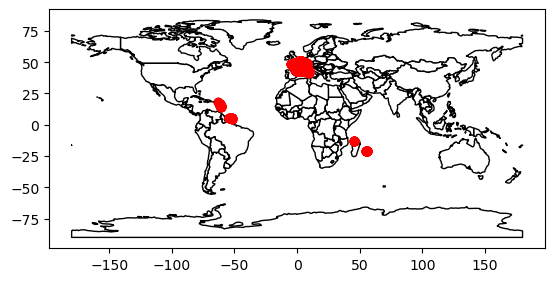

In [9]:
#première tentative
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
ax = world.plot(
    color='white', edgecolor='black')
gdf.plot(ax=ax, color='red')

plt.show()

In [10]:
map = folium.Map(location=[48.8, 2.19], zoom_start=9, control_scale= True, prefer_canvas = True) 
#à peu près centrée sur paris
#prefer_canvas accélère l'utilisation de la carte

In [11]:
#on reprend le fichier des communes pour ne pas avoir que celles qui ont un lycée
df_communes = pd.read_excel("FILO2019_DEC_COM.xlsx", sheet_name = 1, header=[4,5])
df_com = df_communes.copy()
df_com = df_com.drop(['PMIMP19', 'Q119', 'Q319','Q3_Q1','D119', 'D219', 'D319', 'D419', 'D619', 'D719', 'D819', 'D919', 'RD', 'S80S2019', 'GI19', 'PACT19', 'PTSA19', 'PCHO19', 'PBEN19', 'PPEN19', 'PAUT19'], axis = 1, level = 1 )
df_com.columns = df_com.columns.map('_'.join).str.strip('_') 


In [12]:
#communes de france métropolitaine et d'outre mer
#c'est beaucoup trop lourd
#liste= ["11", "24", "28", "27", "32", "44", "52", "53", "75", "76", "84", "93", "94", "01", "02", "03", "04"]

#fr = cartiflette.s3.download_vectorfile_url_all(
   # values = liste,
   # level="COMMUNE",
   # vectorfile_format="geojson",
   # decoupage="region",
   # year=2022)
#ax = fr.plot()
#ax.set_axis_off()

In [13]:
#fr= fr.drop(["NOM", "NOM_M", "STATUT", "POPULATION", "INSEE_CAN", "INSEE_ARR", "INSEE_DEP"], axis= 1)
#fr= fr.drop( "SIREN_EPCI", axis = 1)
#fr

In [14]:
#si on veut les arrondissements
#regions = cartiflette.s3.download_vectorfile_url_all(
    #values = ["75", "92", "93", "94"],
    #level="COMMUNE_ARRONDISSEMENT",
    #vectorfile_format="geojson",
    #decoupage="departement",
    #year=2022)
#ax = regions.plot()
#ax.set_axis_off()


In [15]:
#convertir le fichier pour que ça prenne le bon identifiant
#fr_json_with_id = fr.set_index(keys = "INSEE_COM").to_json()

In [16]:
#convertir le fichier pour que ça prenne le bon identifiant
leger_json_with_id = leger.set_index(keys = "codgeo").to_json()

In [17]:
#rajoute la couleur en fonction du niveau de revenu

folium.Choropleth(
    geo_data=leger_json_with_id,
    name="choropleth",
    data=df_com,
    columns=["Code géographique_CODGEO", "Médiane (€)_Q219"],
    key_on= "feature.id",
    fill_color="BuPu",
    fill_opacity=0.7,
    line_opacity=.1,
    legend_name="Médiane (€)_Q219",
    prefer_canvas = True
).add_to(map)

folium.LayerControl().add_to(map)


In [18]:
#on rajoute des marqueurs pour tous les lycées (pour toute la france)#
# Create a geometry list from the GeoDataFrame
gdf_list = [[point.xy[1][0], point.xy[0][0]] for point in gdf.geometry]


# Iterate through list and add a marker for lycée, color-coded by its type.
i = 0
for coordinates in gdf_list:
    # assigner une couleur de marqueur selon le type de lycée
    if gdf["Nombre d'élèves présents au Bac_TOTAL_LGT"][i] > 0.5:
     #général et techno (on pourrait séparer en général et techno si on veut)
        html=f"""
        <h5> {gdf["Informations établissement_Etablissement"][i]}</h5>
        <p>Taux de réussite global: {gdf["Taux de réussite bruts_TOTAL_LGT"][i]} </p>
        <ul>
            <li>Taux de réussite filières générales: {gdf["Taux de réussite bruts_GNLE"][i]}</li>
            <li>Taux de réussite filières techno: {gdf["Taux de réussite bruts_Taux brut techno"][i]}</li>
        </ul>
        """
        iframe = folium.IFrame(html=html, width=200, height=200)
      
        map.add_child(
            folium.Marker(
                location=coordinates,
                popup= folium.Popup(iframe, max_width=2650),
                icon=folium.Icon(color="green"),
            )
        )
    else:
     #pro
        html=f"""
        <h5> {gdf["Informations établissement_Etablissement"][i]}</h5>
        <p>Taux de réussite global: {gdf["Taux de réussite bruts_TOTAL_Pro"][i]} </p>
        """
        iframe = folium.IFrame(html=html, width=200, height=125)
        map.add_child(
            folium.Marker(
                location=coordinates,
                popup=folium.Popup(iframe, max_width=2650) ,
                icon=folium.Icon(color="red"),
            )
        )
 # je n'ai mis que le nom de l'établissement et le taux de réussite pour l'instant mais on peut rajouter d'autres données facilement
    
    i = i + 1

In [19]:
#afficher la carte (mettre en commentaire quand on bosse sur le code, sinon lent)
#map

In [20]:
#pour enregistrer la carte
map.save(outfile ='carte_sans_outre_mer.html') #il reste les marqueurs des lycées d'outre mer mais on peut facilement les enlever si on veut

In [21]:
#le plus lourd c'est vraiment le fond coloré : le fond de carte seul fait quelques ko et les marqueurs+fond 6Mo, la carte totale en fait quasiment 60...